In [1]:
import os
import zipfile
import shutil

Delete the directory Code for Rerun purposes

In [2]:

# folder_path = "/content/buildings"

# try:
#   if os.path.isdir(folder_path):
#     # Remove the folder and its contents recursively
#     shutil.rmtree(folder_path)
#     print(f"Folder deleted: {folder_path}")
#   else:
#     print(f"Folder not found: {folder_path}")
# except OSError as e:
#   print(f"Error deleting folder: {e}")

Fetch the Directory

In [3]:
def unzip_file(file_path, destination_folder):
  """
  This function unzips
  """
  if os.path.isfile(file_path) and file_path.endswith(".zip"):
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
      zip_ref.extractall(destination_folder)
  else:
    print(f"Error: '{file_path}' is not a valid zip file.")

unzip_file("buildings.zip", "")

In [4]:
import os
from PIL import Image  # For handling image formats

def check_and_print_non_jpg_images(data_dir):
  """
  checks image formats,
  and prints the paths of non-JPG/JPEG images.
  """
  for root, _, files in os.walk(data_dir):
    for filename in files:
      ext = os.path.splitext(filename)[1].lower()

      # Chk valid JPG/JPEG extensions
      if ext not in (".jpg", ".jpeg"):
        image_path = os.path.join(root, filename)
        print(f"Non-JPG/JPEG image: {image_path}")

data_dir = "/content/buildings"
check_and_print_non_jpg_images(data_dir)


Analyze the data


Summary of /content/buildings
Total Files: 283
Number of Classes: 32
Class Counts: {'New folder (3)': 10, 'New folder (9)': 8, 'New folder (16)': 8, 'New folder (48)': 6, 'New folder (4)': 11, 'New folder (13)': 11, 'New folder (7)': 10, 'New folder (8)': 10, 'New folder (20)': 6, 'New folder (12)': 11, 'New folder (49)': 7, 'New folder (5)': 11, 'New folder (25)': 8, 'New folder (6)': 9, 'New folder (22)': 10, 'New folder (2)': 8, 'New folder (10)': 12, 'New folder (18)': 9, 'New folder (11)': 10, 'New folder (50)': 7, 'New folder (24)': 9, 'New folder (46)': 8, 'New folder (19)': 8, 'New folder (17)': 11, 'New folder (15)': 8, 'New folder (47)': 5, 'New folder (26)': 8, 'New folder (21)': 10, 'New folder (23)': 6, 'New folder (27)': 7, 'New folder': 11, 'New folder (14)': 10}


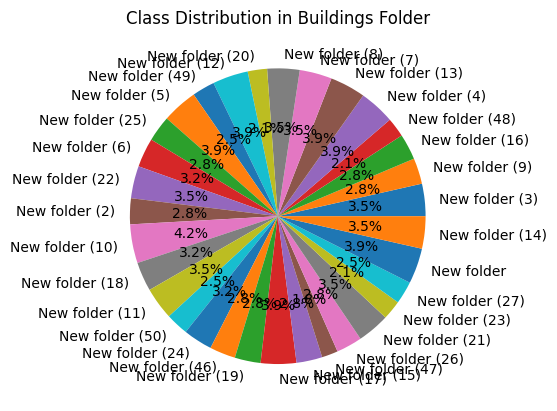

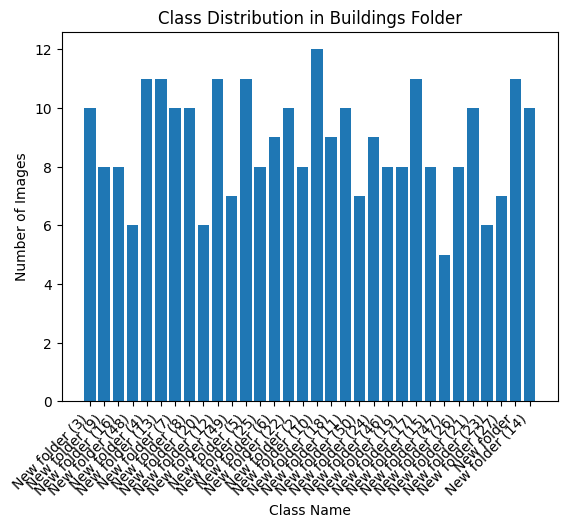

Image Dimensions:
  - Max Width: 6668
  - Min Width: 139
  - Max Height: 5000
  - Min Height: 157
  - Average Width: 225.00
  - Average Height: 225.00
Colored Images: 140
Grayscale Images: 143


In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def analyze_buildings_folder(folder_path):
  """
  Analyzes the 'buildings' folder and provides various statistics.
  """

  # Initialize counters
  total_files = 0
  class_counts = {}
  colored_images = 0
  grayscale_images = 0

  # Get a list of all subfolders (classes)
  classes = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]

  # Initialize max and min dimensions
  max_width, min_width, max_height, min_height = 0, 10000, 0, 10000

  # Iterate through each class
  for class_name in classes:
    class_path = os.path.join(folder_path, class_name)
    class_files = len(os.listdir(class_path))  # Count files in the class

    # Update counters
    total_files += class_files
    class_counts[class_name] = class_files

    # Analyze images within the class
    for filename in os.listdir(class_path):
      image_path = os.path.join(class_path, filename)
      try:
        # Open image using Pillow
        image = Image.open(image_path)

        # Check for grayscale or color mode
        if len(image.mode) == 1:  # Grayscale
          grayscale_images += 1
        else:
          colored_images += 1

        # Get image dimensions
        width, height = image.size
        if not total_files:  # Initialize on first image
          max_width, min_width, max_height, min_height = width, width, height, height
        else:
          max_width = max(max_width, width)
          min_width = min(min_width, width)
          max_height = max(max_height, height)
          min_height = min(min_height, height)

      except (IOError, OSError):
        print(f"Error: Could not open image {image_path}")

  # Print summary
  print(f"Summary of {folder_path}")
  print(f"Total Files: {total_files}")
  print(f"Number of Classes: {len(classes)}")
  print(f"Class Counts: {class_counts}")

  # Generate pie chart for class distribution
  plt.pie(class_counts.values(), labels=class_counts.keys(), autopct="%1.1f%%")
  plt.title("Class Distribution in Buildings Folder")
  plt.show()

  #Generate boxplot
  dimensions = [(width, height) for class_path in classes for filename in os.listdir(os.path.join(folder_path, class_path)) if os.path.isfile(os.path.join(folder_path, class_path, filename))]
  widths, heights = zip(*dimensions)  # img_dims

  # Generate barchart
  plt.bar(class_counts.keys(), class_counts.values())
  plt.xticks(rotation=45, ha='right')  # Rotate class names for readability
  plt.xlabel("Class Name")
  plt.ylabel("Number of Images")
  plt.title("Class Distribution in Buildings Folder")
  plt.show()



  # Print image dimension statistics
  print(f"Image Dimensions:")
  print(f"  - Max Width: {max_width}")
  print(f"  - Min Width: {min_width}")
  print(f"  - Max Height: {max_height}")
  print(f"  - Min Height: {min_height}")
  print(f"  - Average Width: {sum(widths) / total_files:.2f}")
  print(f"  - Average Height: {sum(heights) / total_files:.2f}")

  # Print colored/grayscale image counts
  print(f"Colored Images: {colored_images}")
  print(f"Grayscale Images: {grayscale_images}")


folder_path = "/content/buildings"
analyze_buildings_folder(folder_path)


In [6]:
def polynomial_smooth_outline(image):
  """
  This function finds contors, makes a canvas, returns the filter
  """
  # Convert image to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Apply bilateral filter for smoother edges
  smoothed = cv2.bilateralFilter(gray, d=9, sigmaColor=75, sigmaSpace=75)

  # Threshold the smoothed image to create a binary mask
  _, mask = cv2.threshold(smoothed, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

  # Invert the binary mask
  mask = cv2.bitwise_not(mask)

  # Apply morphological operations to fill in gaps and smooth the outline
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)
  mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)

  # Dilate the mask to ensure all edges are captured
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
  mask = cv2.dilate(mask, kernel, iterations=1)

  # Create a blank canvas with white background
  canvas = np.ones_like(gray) * 255

  # Draw the smoothed outline on the canvas (black color)
  contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  cv2.drawContours(canvas, contours, -1, (0), 2)  # Black color, thickness 2

  return canvas

In [7]:

def line_art_conversion(image):
  """
  This function returns edge detection result with inverted colors
  """
  # Convert image to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Apply Gaussian blur to smooth the image (optional)
  blurred = cv2.GaussianBlur(gray, (11, 11), 0)

  # Perform Canny edge detection
  edges = cv2.Canny(blurred, 70, 180)
  # Dilate the edges to make them thicker
  kernel = np.ones((3,3), np.uint8)  # Adjust the kernel size for desired thickness
  edges = cv2.dilate(edges, kernel, iterations=1)
  # Invert the binary image
  edges = cv2.bitwise_not(edges)

  return edges


### **Image Warps:**

    >> offset = int(amplitude * math.sin(frequency * 3.14 * pixel_row / 150))

In [8]:
import cv2
import numpy as np
import math


def vertical_wave(image):
  """
  Applies a vertical wave effect to a grayscale image.

  Returns:
      Vertical wave image effect as a NumPy array
  """
  rows, cols = image.shape
  img_output = np.zeros(image.shape, dtype=image.dtype)

  for i in range(rows):
    for j in range(cols):
      offset_x = int(3 * math.sin(2.6 * 3.14 * i / 180))
      offset_y = 0
      if j + offset_x < cols:
        img_output[i, j] = image[i, (j + offset_x) % cols]
      else:
        img_output[i, j] = 255  # Set extra spaces to white

  return img_output


def horizontal_wave(image):
  """
  Applies a horizontal wave effect to a grayscale image.

  Returns:
      horizontal wave image effect as a NumPy array
  """
  rows, cols = image.shape
  img_output = np.zeros(image.shape, dtype=image.dtype)

  for i in range(rows):
    for j in range(cols):
      offset_x = 0
      offset_y = int(-4.0 * math.sin(2 * 3.14 * j / 150))
      if i + offset_y < rows:
        img_output[i, j] = image[(i + offset_y) % rows, j]
      else:
        img_output[i, j] = 255  # Set extra spaces to white

  return img_output


def multidirectional_wave(image):
  """
  Applies a combined horizontal and vertical wave effect to a grayscale image.

  Returns:
      Combined wave image effect as a NumPy array.
  """
  rows, cols = image.shape
  img_output = np.zeros(image.shape, dtype=image.dtype)

  # for random x
  amplitude_x = np.random.uniform(-4.6, -2.7) if np.random.rand() < 0.5 else np.random.uniform(2.1, 5)
  # for random y
  amplitude_y = np.random.uniform(-4.2, -2.8)

  for i in range(rows):
    for j in range(cols):
      offset_x = int(amplitude_x * math.sin(2.6 * 3.14 * i / 150))
      offset_y = int(amplitude_y * math.cos(2 * 3.14 * j / 150))
      if i + offset_y < rows and j + offset_x < cols:
        img_output[i, j] = image[(i + offset_y) % rows, (j + offset_x) % cols]
      else:
        img_output[i, j] = 255  # Set extra spaces to white

  return img_output


# def concave_effect(image):
#   """
#   Applies a concave distortion effect to a grayscale image.

#   Returns:
#       concave effect image as a NumPy array.
#   """
#   rows, cols = image.shape
#   img_output = np.zeros(image.shape, dtype=image.dtype)

#   for i in range(rows):

#     for j in range(cols):
#       offset_x = int(64 * math.sin(2 * 3.14 * i / (2 * cols)))
#       offset_y = 0
#       if j + offset_x < cols:
#         img_output[i, j] = image[i, (j + offset_x) % cols]
#       else:
#         img_output[i, j] = 255  # Set extra spaces to white

#   return img_output


# def inverse_concave_effect(image):
#   """
#   Applies a concave distortion effect to a grayscale image.

#   Returns:
#       concave effect image as a NumPy array.
#   """

#   rows, cols = image.shape
#   img_output = np.zeros(image.shape, dtype=image.dtype)

#   for i in range(rows):

#     for j in range(cols):
#       offset_x = int(-64 * math.sin(2 * 3.14 * i / (2 * cols)))
#       offset_y = 0
#       if j + offset_x < cols:
#         img_output[i, j] = image[i, (j + offset_x) % cols]
#       else:
#         img_output[i, j] = 255  # Set extra spaces to white

#   return img_output

In [9]:
def populate_dataset(folder_path):
  # Get a list of all the image files in the folder
  image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]

  # Iterate through each image file
  for i, image_file in enumerate(image_files):
    image_path = os.path.join(folder_path, image_file)
    print(image_path)
    # Load the image

    image = cv2.imread(image_path)
    target_size = (512, 512)
    image = cv2.resize(image, target_size)
    imgs = None

    # Check if the image was read successfully
    if image is not None:
      # Apply the line art conversion
      line_art = line_art_conversion(image)

      # Apply the polynomial smooth outline
      poly_smoothing = polynomial_smooth_outline(image)

      # Apply the wave effects
      vertical_line_art = vertical_wave(line_art)
      horizontal_line_art = horizontal_wave(line_art)
      multi_line_art = multidirectional_wave(line_art)

      vertical_poly_smoothing = vertical_wave(poly_smoothing)
      horizontal_poly_smoothing = horizontal_wave(poly_smoothing)
      multi_poly_smoothing = multidirectional_wave(poly_smoothing)

      # Read the image in grayscale
      imgs = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
      imgs = cv2.resize(imgs, target_size)

      vertical_image = vertical_wave(imgs)
      horizontal_image = horizontal_wave(imgs)
      multi_image = multidirectional_wave(imgs)

      # Remove the original image
      os.remove(image_path)

      # Save the resulting images with an iterator in the filename
      cv2.imwrite(os.path.join(folder_path, 'original_{}.jpg'.format(i)), imgs)
      cv2.imwrite(os.path.join(folder_path, 'line_art_{}.jpg'.format(i)), line_art)
      cv2.imwrite(os.path.join(folder_path, 'poly_smoothing_{}.jpg'.format(i)), poly_smoothing)
      cv2.imwrite(os.path.join(folder_path, 'vertical_line_art_{}.jpg'.format(i)), vertical_line_art)
      cv2.imwrite(os.path.join(folder_path, 'horizontal_line_art_{}.jpg'.format(i)), horizontal_line_art)
      cv2.imwrite(os.path.join(folder_path, 'multi_line_art_{}.jpg'.format(i)), multi_line_art)
      cv2.imwrite(os.path.join(folder_path, 'vertical_poly_smoothing_{}.jpg'.format(i)), vertical_poly_smoothing)
      cv2.imwrite(os.path.join(folder_path, 'horizontal_poly_smoothing_{}.jpg'.format(i)), horizontal_poly_smoothing)
      cv2.imwrite(os.path.join(folder_path, 'multi_poly_smoothing_{}.jpg'.format(i)), multi_poly_smoothing)
      cv2.imwrite(os.path.join(folder_path, 'vertical_image_{}.jpg'.format(i)), vertical_image)
      cv2.imwrite(os.path.join(folder_path, 'horizontal_image_{}.jpg'.format(i)), horizontal_image)
      cv2.imwrite(os.path.join(folder_path, 'multi_image_{}.jpg'.format(i)), multi_image)
    else:
      print(f"Error: Could not read image from {image_path}")


**Expanda and Populate the Dataset**

Here comes the magic:

  -> Each image x is categorized to three types:

      >> Original Image
      >> Canny Edge tracing
      >> Polynomial Tracing through Contours

  -> Each Image goes through three Warps:

      >> Vertical (Non-random)
      >> Horizontal (Non-random)
      >> Dual : Random Vertical and Horizontal
  
  => Our total dataset for 'n' images becomes (12n) .i.e. if a dataset for one class as n = 5, then our dataset for one class becomes 60 [which is the least in our dataset]!


In [10]:
import os

# Define the base folder path
base_folder = "/content/buildings"

# Get all subfolders within base folder
subfolders = [f for f in os.listdir(base_folder) if os.path.isdir(os.path.join(base_folder, f))]

# Loop through each subfolder
for folder in subfolders:
  # Construct the full folder path
  folder_path = os.path.join(base_folder, folder)

  # Call the populate_dataset function for this folder
  populate_dataset(folder_path)
  print(f"Processed images in folder: {folder_path}")

/content/buildings/New folder (3)/1b90b115671a3e69e3f6a882172b8a2e.jpg
/content/buildings/New folder (3)/14012c72bb400c140291ff4d7f6d1f90.jpg
/content/buildings/New folder (3)/7c9b83fb327f07b9ef19a71dfbd62ce9.jpg
/content/buildings/New folder (3)/burj_khalifa_sketch_dubai_uae_by_shezzychauhdry_dgv9rq3-fullview.jpg
/content/buildings/New folder (3)/burjkhalifa-1.jpg
/content/buildings/New folder (3)/654b1b3f185b49cd4cdfd30ee83b39c0.jpg
Processed images in folder: /content/buildings/New folder (3)
/content/buildings/New folder (9)/Leaning Tower of Pisa.jpg
/content/buildings/New folder (9)/20 free vector icons of Monuments designed by Zlatko Najdenovski.jpg
/content/buildings/New folder (9)/download.jpg
/content/buildings/New folder (9)/Torre De Pisa ícones gratuitos criados por Kanyanee Watanajitkasem.jpg
/content/buildings/New folder (9)/images.jpg
/content/buildings/New folder (9)/imageees.jpg
/content/buildings/New folder (9)/istockphoto-1306379034-612x612.jpg
/content/buildings/New 

### ***New Analytics:***

Summary of /content/buildings
Total Files: 3264
Number of Classes: 32
Class Counts: {'New folder (3)': 76, 'New folder (9)': 96, 'New folder (16)': 96, 'New folder (48)': 72, 'New folder (4)': 110, 'New folder (13)': 121, 'New folder (7)': 120, 'New folder (8)': 120, 'New folder (20)': 61, 'New folder (12)': 132, 'New folder (49)': 84, 'New folder (5)': 99, 'New folder (25)': 96, 'New folder (6)': 108, 'New folder (22)': 120, 'New folder (2)': 96, 'New folder (10)': 144, 'New folder (18)': 108, 'New folder (11)': 120, 'New folder (50)': 73, 'New folder (24)': 108, 'New folder (46)': 96, 'New folder (19)': 96, 'New folder (17)': 132, 'New folder (15)': 96, 'New folder (47)': 60, 'New folder (26)': 96, 'New folder (21)': 120, 'New folder (23)': 72, 'New folder (27)': 84, 'New folder': 132, 'New folder (14)': 120}


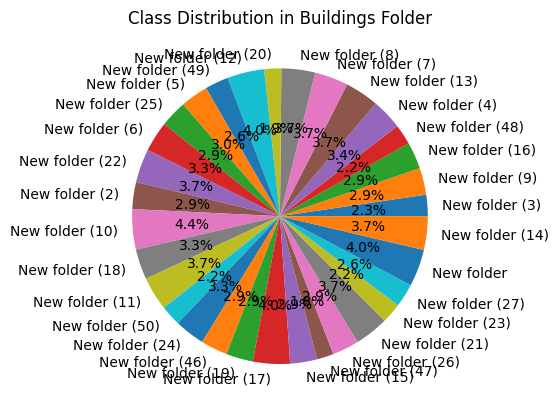

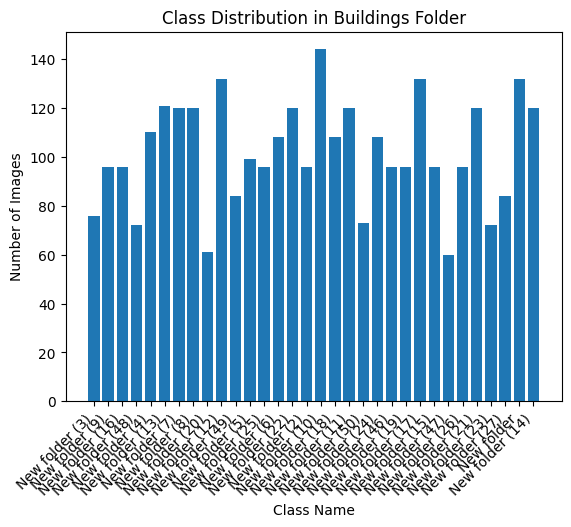

Image Dimensions:
  - Max Width: 1417
  - Min Width: 200
  - Max Height: 1417
  - Min Height: 200
  - Average Width: 512.00
  - Average Height: 512.00
Colored Images: 7
Grayscale Images: 3257


In [11]:
folder_path = "/content/buildings"
analyze_buildings_folder(folder_path)


Converting to .zip and downloading

In [ ]:
import shutil

# Define the base folder path (assuming processing is complete)
base_folder = "/content/buildings"

# Create a ZIP archive named "buildings.zip" in the same directory
shutil.make_archive(base_folder, 'zip', base_folder)
print("Created ZIP archive: buildings.zip")


Created ZIP archive: buildings.zip


In [ ]:
from google.colab import files
downloaded = files.download('buildings.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**NOTICE**: We have to prepare final dataset manually. Remove the dirty fishes from pond. Delete Empty Images (Empty Images are not NULL; have tracing so thin that appears to be NULL)

**Data Labeling**

In [18]:


data_dir = "/content/buildings"
check_and_print_non_jpg_images(data_dir)


Found 3264 files belonging to 32 classes.
Type of images: <class 'tensorflow.python.framework.tensor.TensorSpec'>
Type of labels: <class 'tensorflow.python.framework.tensor.TensorSpec'>


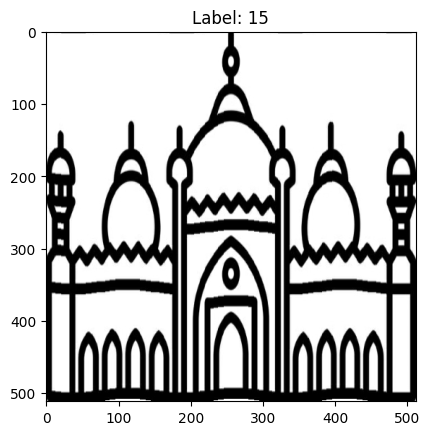

In [20]:
import tensorflow as tf
from matplotlib import pyplot as plt

# Define the data directory
data_dir = "/content/buildings"

# Set target image size (e.g., 512x512)
target_image_size = (512, 512)

# Create the labeled dataset using image_dataset_from_directory
data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size=32,
    image_size=target_image_size,
    shuffle=True,
    seed=123,
    color_mode='grayscale'
)

# Print the data type of images and labels
print(f"Type of images: {type(data.element_spec[0])}")
print(f"Type of labels: {type(data.element_spec[1])}")

#See what our data has become
for images, labels in data.take(1):
  for i in range(len(images)):
    try:
      plt.imshow(images[i].numpy(), cmap='gray')
      plt.title(f"Label: {labels[i].numpy()}")
      plt.show()
    except :
      print(f"Skipping non-JPG/JPEG image at index {i}")
    break


# Pre-process data
data = data.map(lambda x, y: (x / 255.0, y))  # Normalize to 0-1 range


In [23]:
print(data)

<_MapDataset element_spec=(TensorSpec(shape=(None, 512, 512, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


# **Methodology:**

  >> Now, the data will be trained, test, split and fitted into a CNN model for the next step. The results will be analysed and classes would be added or removed based on feedback. Might have to do transfer learning with frozen layers in worst case.

# **Temporary/Testing CODE**

In [ ]:


def stretch_distort_doodle(image):

  # Increase image size slightly to allow for more distortion freedom
  rows, cols = image.shape
  padded_image = cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=0)

  # Generate random distortion points
  num_points = 20  # Adjust for desired level of distortion
  max_offset = 20  # Adjust for distortion intensity


  # Create a mesh grid for the image
  mesh_x, mesh_y = np.meshgrid(np.arange(cols + 1), np.arange(rows + 1))

  distortion_points = np.random.randint(-max_offset, max_offset, size=(num_points, 2))
  repeated_points = np.repeat(distortion_points, rows * cols).reshape(rows + 1, cols + 1)
  displaced_mesh_x = mesh_x + repeated_points[:, 0]
  displaced_mesh_y = mesh_y + repeated_points[:, 1]

  # Perform image remapping based on the distorted mesh
  warped_image = cv2.remap(padded_image, displaced_mesh_x.astype(np.float32),
                          displaced_mesh_y.astype(np.float32), cv2.INTER_CUBIC)

  # Reduce image size back to original dimensions (optional)
  warped_image = warped_image[10:-10, 10:-10]

  return warped_image


In [ ]:
import os
from sklearn.preprocessing import LabelEncoder

# Path to "buildings" is os.dir
dataset_folder = "buildings"


image_paths = []
labels = []

# Iterate through each subfolder (class)
for class_name in os.listdir(dataset_folder):
    class_folder = os.path.join(dataset_folder, class_name)
    if os.path.isdir(class_folder):
        image_files = [f for f in os.listdir(class_folder) if f.lower().endswith((".jpg", ".jpeg"))]
        image_paths.extend([os.path.join(class_folder, img) for img in image_files])
        class_name = os.path.basename(class_folder)
        labels.extend([class_name] * len(image_files))

# Initialize a label encoder
label_encoder = LabelEncoder()

# Fit the label encoder on the class labels
label_encoder.fit(labels)

# Transform class labels to numerical values
encoded_labels = label_encoder.transform(labels)

# Print the total number of images and their corresponding encoded labels
print(f"Total images: {len(image_paths)}")
print(f"Encoded labels: {encoded_labels}")


Total images: 33
Encoded labels: [0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 4 4 4 4 4 4 4 1 1 1 1 1 2 2 2 2 2 2]


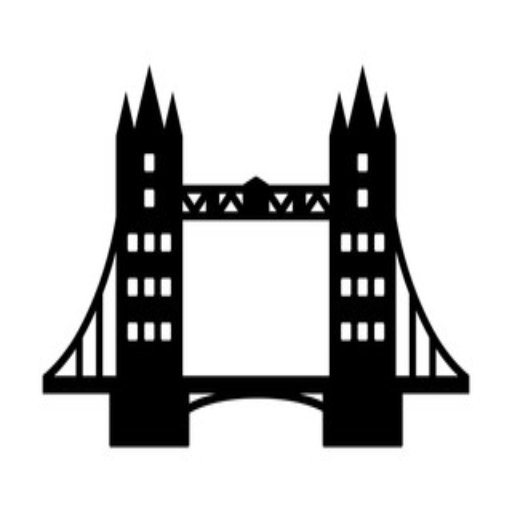

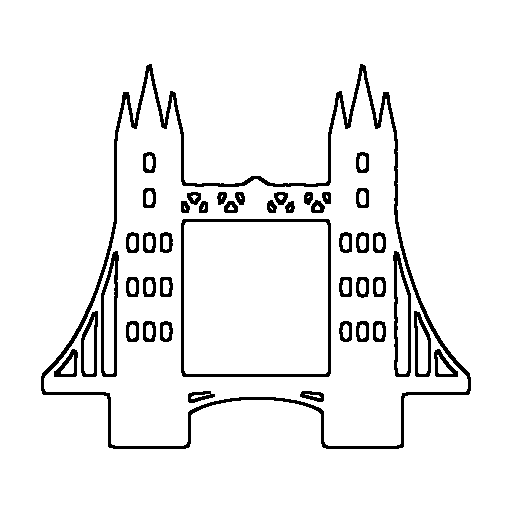

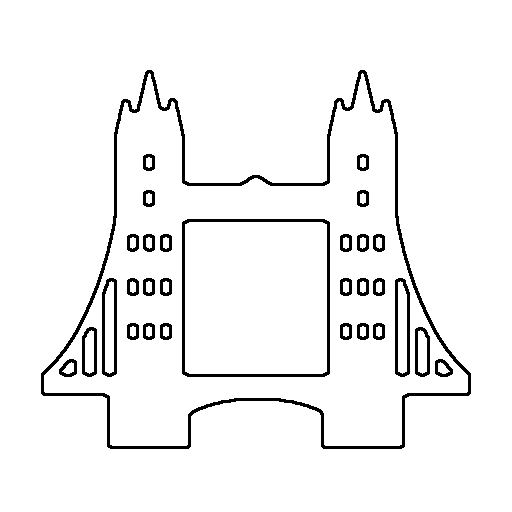

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


image_path = "buildings/New folder (46)/240_F_99796531_GC7QuDQ7aBkAy3wjp4stWmf0KEMYk7nr.jpg" #"buildings/New folder (46)/1000_F_119531377_cKMK5dCkL77HBDh4aFco1gOWAL59Tiuv.jpg"
# Load your image
img = cv2.imread(image_path)
target_size = (512,512)
image = cv2.resize(img, target_size)

line_art = None
line_art2 = None
# Check if image was read successfully
if image is not None:
  cv2_imshow(image)  # Assuming cv2_imshow is your function to display the image
  # Apply line art conversion
  line_art = line_art_conversion(image)
  # smoothing = smooth_outline(image)
  poly_smoothing = polynomial_smooth_outline(image)
else:
  print(f"Error: Could not read image from {image}")

cv2_imshow(line_art)
# cv2_imshow(smoothing)
cv2_imshow(poly_smoothing)
#resized_image = cv2.resize(line_art, (400, 300))
#doodle_image = stretch_distort_doodle(resized_image)
#cv2_imshow(doodle_image)





cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
imgs = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

imgs = cv2.resize(imgs, target_size)

vertical_image = vertical_wave(imgs)
horizontal_image = horizontal_wave(imgs)
multi_image = multidirectional_wave(imgs)
# concave_image = concave_effect(imgs)
# inv_concave_image = inverse_concave_effect(imgs)



In [ ]:

vertical_line_art = vertical_wave(line_art)
horizontal_line_art = horizontal_wave(line_art)
multi_line_art = multidirectional_wave(line_art)
# concave_line_art = concave_effect(line_art)
# inv_concave_line_art = inverse_concave_effect(line_art)

In [ ]:


# vertical_smoothing = vertical_wave(smoothing)
# horizontal_smoothing = horizontal_wave(smoothing)
# multi_smoothing = multidirectional_wave(smoothing)
# concave_smoothing = concave_effect(smoothing)
# inv_concave_smoothing = inverse_concave_effect(smoothing)

In [ ]:

vertical_poly_smoothing = vertical_wave(poly_smoothing)
horizontal_poly_smoothing = horizontal_wave(poly_smoothing)
multi_poly_smoothing = multidirectional_wave(poly_smoothing)
# concave_poly_smoothing = concave_effect(poly_smoothing)
# inv_concave_poly_smoothing = inverse_concave_effect(poly_smoothing)

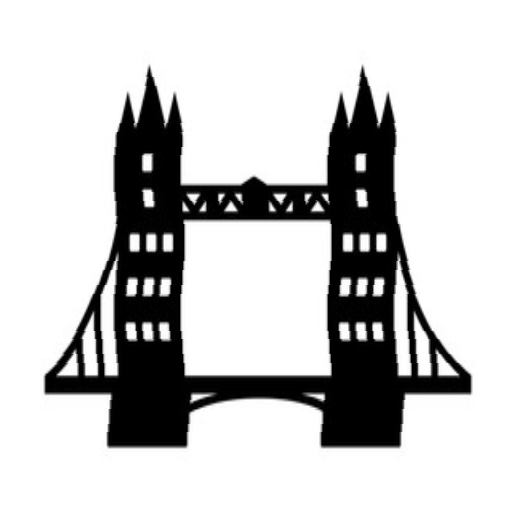

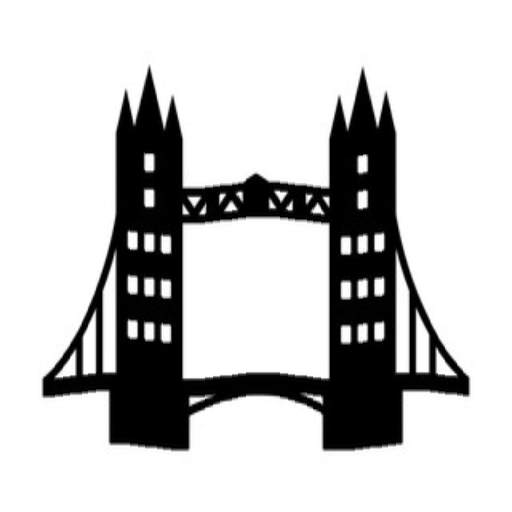

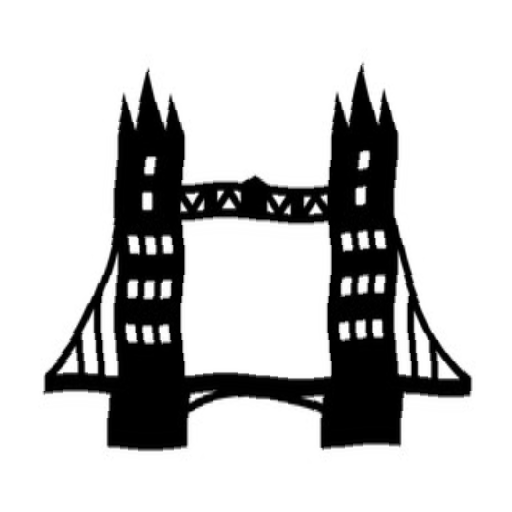

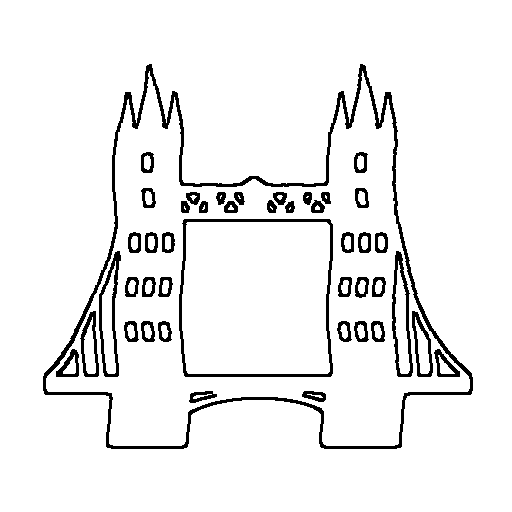

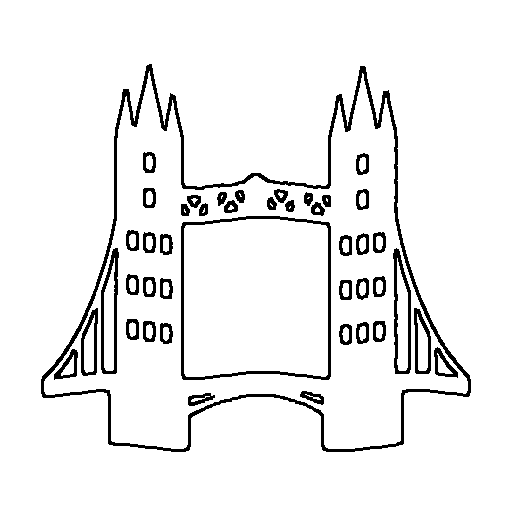

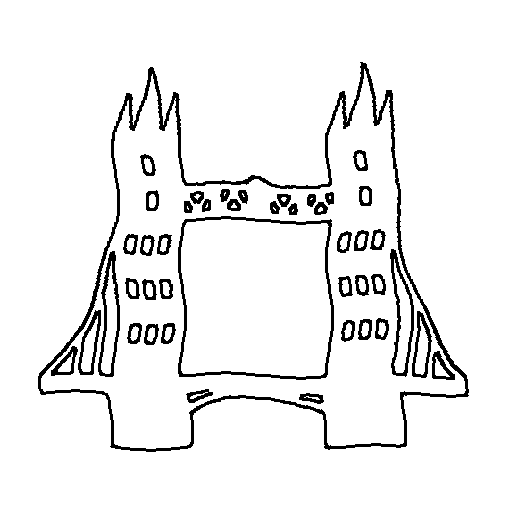

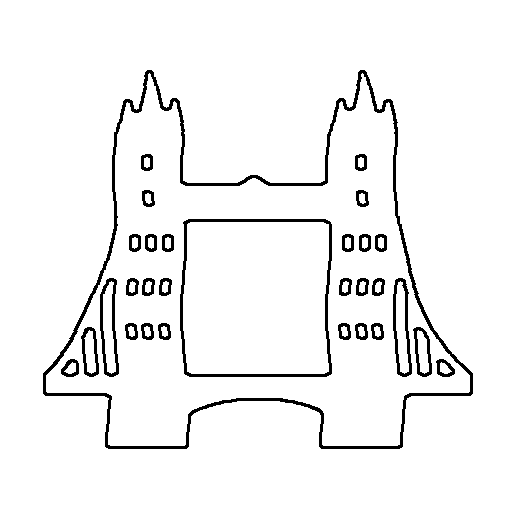

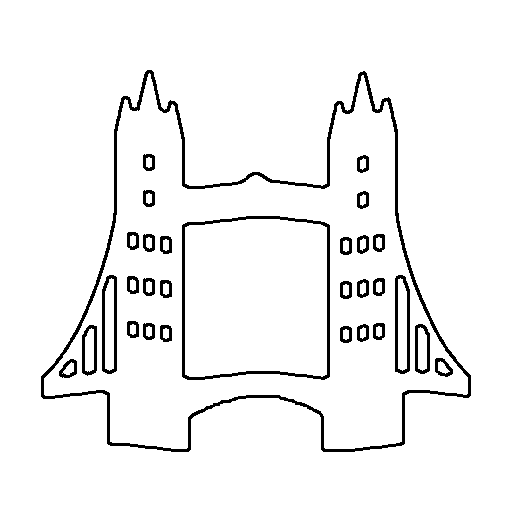

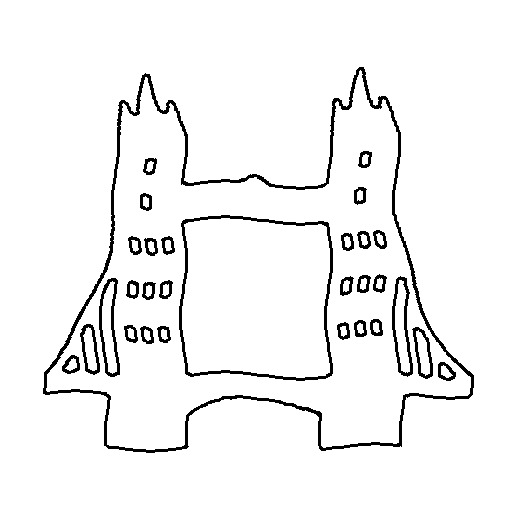

In [ ]:



cv2_imshow(vertical_image)
cv2_imshow(horizontal_image)
cv2_imshow(multi_image)
# cv2_imshow(concave_image)
# cv2_imshow(inv_concave_image)

cv2_imshow(vertical_line_art)
cv2_imshow(horizontal_line_art)
cv2_imshow(multi_line_art)
# cv2_imshow(concave_line_art)
# cv2_imshow(inv_concave_line_art)




# cv2_imshow(vertical_smoothing)
# cv2_imshow(horizontal_smoothing)
# cv2_imshow(multi_smoothing)
# cv2_imshow(concave_smoothing)
# cv2_imshow(inv_concave_smoothing)


cv2_imshow(vertical_poly_smoothing)
cv2_imshow(horizontal_poly_smoothing)
cv2_imshow(multi_poly_smoothing)
# cv2_imshow(concave_poly_smoothing)
# cv2_imshow(inv_concave_poly_smoothing)

In [ ]:
# def smooth_outline(image):
#     # Convert image to grayscale
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     # Apply bilateral filter for smoother edges
#     smoothed = cv2.bilateralFilter(gray, d=9, sigmaColor=75, sigmaSpace=75)

#     # Threshold the smoothed image to create a binary mask
#     _, mask = cv2.threshold(smoothed, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#     # Invert the binary mask
#     mask = cv2.bitwise_not(mask)

#     # Create a blank canvas with a white background
#     canvas = np.ones_like(gray) * 255

#     # Draw the smoothed outline on the canvas with black color
#     contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     cv2.drawContours(canvas, contours, -1, (0), 2)  # Black color, thickness 2

#     return canvas

In [ ]:
# for images, labels in data:
#     for i in range(len(images)):
#         try:
#             print(f"Image {i} shape: {images[i].shape}")
#         except Exception as e:
#             print(f"Error in Image {i}: {e}")

In [ ]:

# # Print the array dimensions of the images
# for images, labels in data:
#   for i in range(len(images)):
#     try:
#       print(f"Image {i} shape: {images[i].shape}")
#     except tf.errors.InvalidArgumentError:
#       print(f"Update this image in Dataset {i}")
#       pass
